In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [6]:
print(df.tail())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [8]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [9]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [10]:
df['age_chol_interaction'] = df['age'] * df['chol']
df['trestbps_chol_interaction'] = df['trestbps'] * df['chol']

In [11]:
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 55, 70, np.inf], labels=['<40', '40-55', '55-70', '>70'])
df['cholesterol_level'] = pd.cut(df['chol'], bins=[0, 200, 240, np.inf], labels=['Normal', 'Borderline High', 'High'])


In [12]:
df['chol_age_ratio'] = df['chol'] / df['age']
df['thalach_age_ratio'] = df['thalach'] / df['age']

In [13]:
df['oldpeak_squared'] = df['oldpeak'] ** 2

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [20]:
importances = rf.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

In [21]:
top_n_features = important_features.head(10).index
X_top_features = X[top_n_features]

In [24]:
log_reg = LogisticRegression(max_iter=5000, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X, y)


RFE(estimator=LogisticRegression(max_iter=5000, random_state=42),
    n_features_to_select=10)

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [26]:
log_reg = LogisticRegression(max_iter=5000, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_scaled, y)

RFE(estimator=LogisticRegression(max_iter=5000, random_state=42),
    n_features_to_select=10)

In [27]:
log_reg = LogisticRegression(max_iter=5000, random_state=42, solver='saga')
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_scaled, y)


RFE(estimator=LogisticRegression(max_iter=5000, random_state=42, solver='saga'),
    n_features_to_select=10)

In [28]:
rfe_selected_features = X.columns[rfe.support_]
print("Selected Features:", rfe_selected_features)

Selected Features: Index(['age', 'sex', 'cp', 'exang', 'oldpeak', 'ca', 'thal',
       'trestbps_chol_interaction', 'thalach_age_ratio', 'age_group_55-70'],
      dtype='object')


In [30]:
log_reg_cv = cross_val_score(log_reg, X_rfe, y, cv=5, scoring='accuracy')
print(f'Logistic Regression CV Accuracy: {log_reg_cv.mean():.4f}')


Logistic Regression CV Accuracy: 0.8517


In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_rfe, y)
best_params = grid_search.best_params_
print(f'Best Random Forest Parameters: {best_params}')

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_rfe, y)
rf_cv = cross_val_score(rf_best, X_rfe, y, cv=5, scoring='accuracy')
print(f'Random Forest CV Accuracy: {rf_cv.mean():.4f}')

Random Forest CV Accuracy: 0.9941


In [34]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_rfe, y)
svm_cv = cross_val_score(svm, X_rfe, y, cv=5, scoring='accuracy')
print(f'SVM CV Accuracy: {svm_cv.mean():.4f}')

SVM CV Accuracy: 0.8507


In [35]:
best_model = max([('Logistic Regression', log_reg_cv.mean()), 
                  ('Random Forest', rf_cv.mean()), 
                  ('SVM', svm_cv.mean())], key=lambda x: x[1])

In [36]:
print(f'Best Model: {best_model[0]} with Accuracy: {best_model[1]:.4f}')

Best Model: Random Forest with Accuracy: 0.9941


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [39]:
importances = rf.feature_importances_
features = X.columns

In [40]:
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


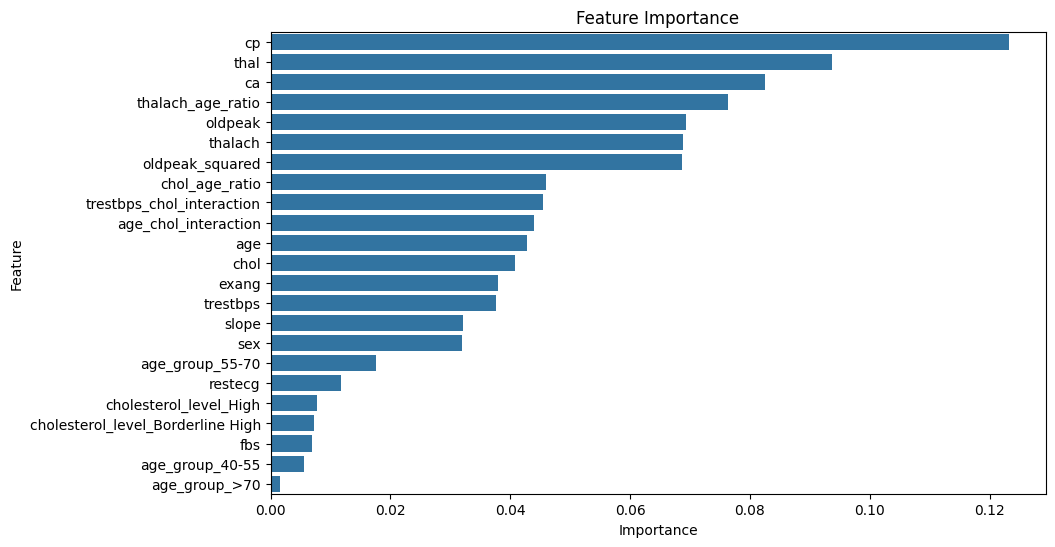

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

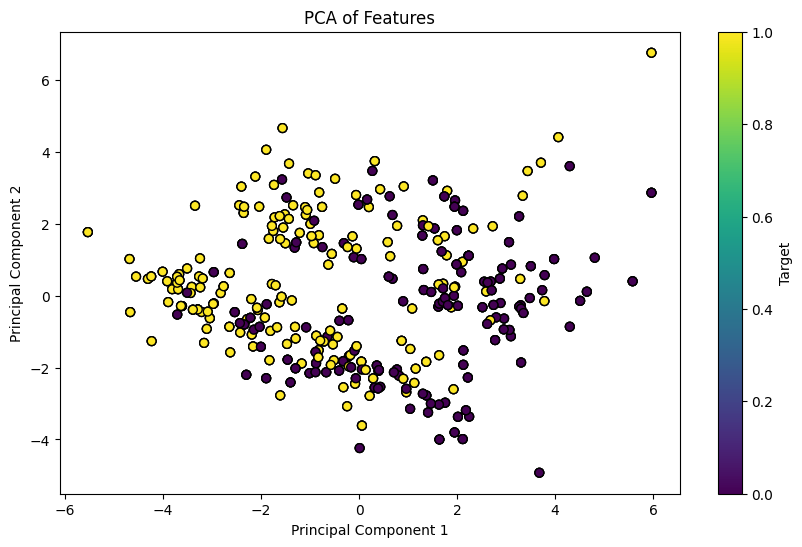

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.colorbar(label='Target')
plt.show()

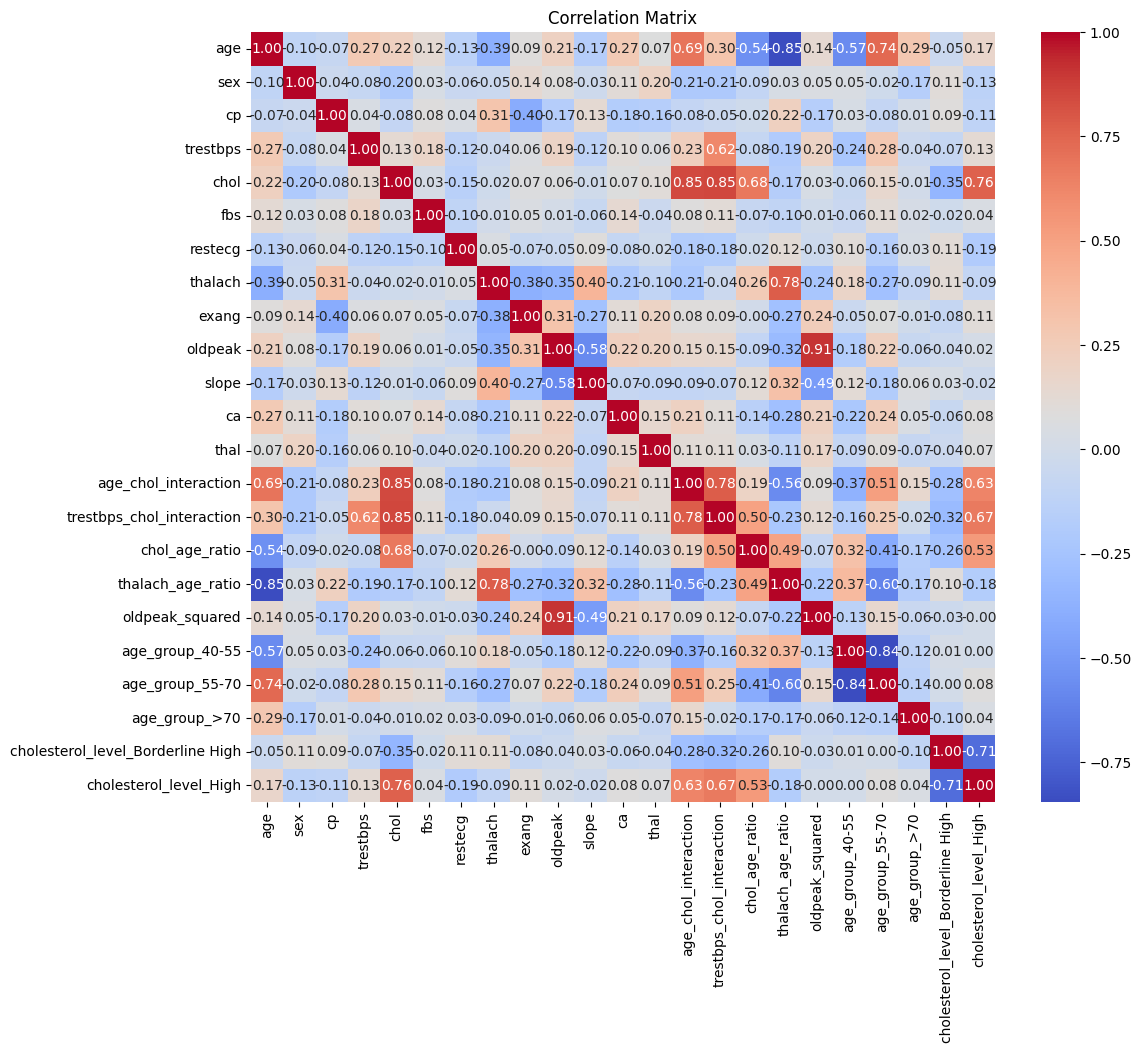

In [47]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculate correlation matrix
corr_matrix = X_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

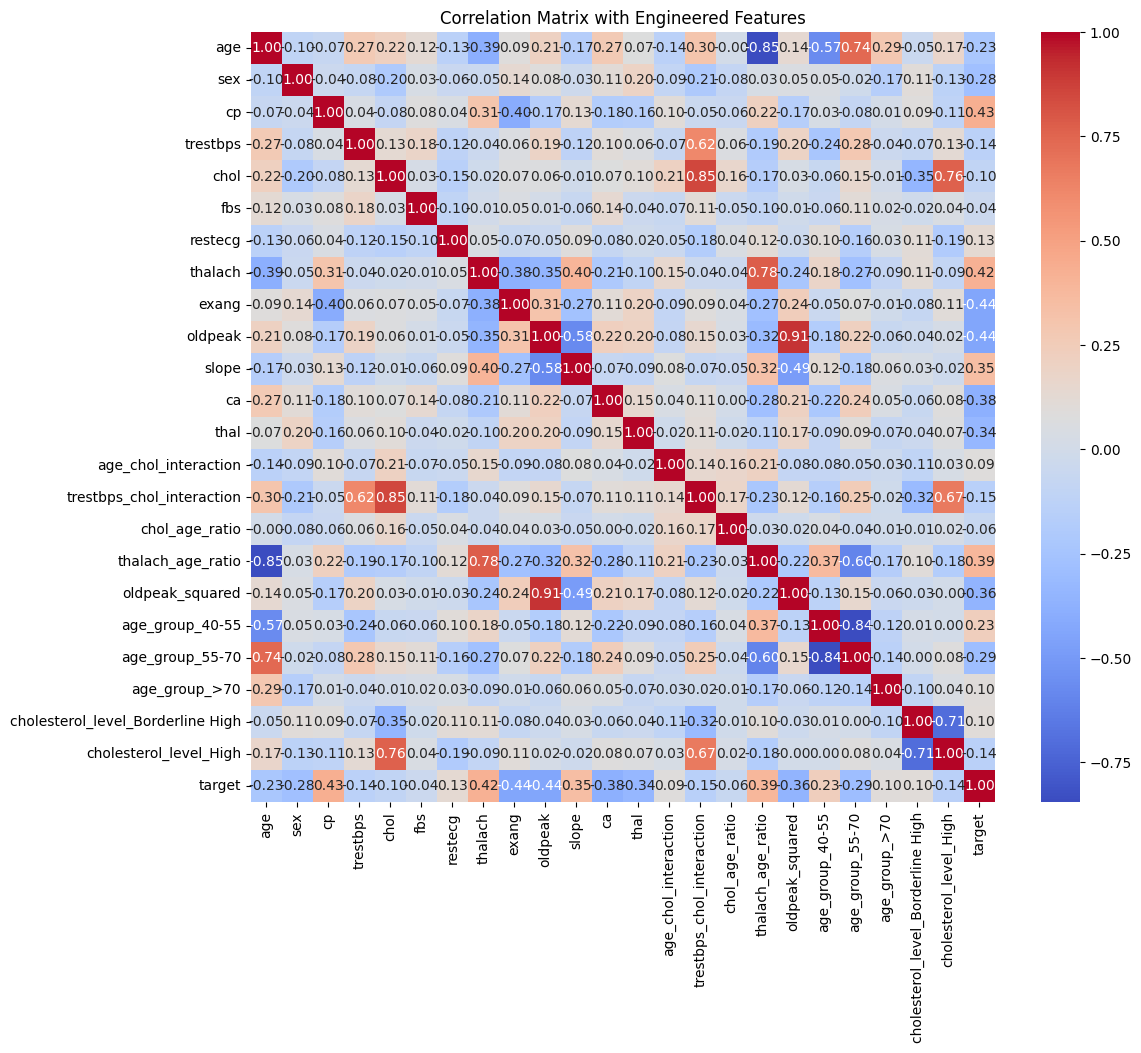

In [49]:
df_plot = pd.DataFrame(X_scaled, columns=X.columns)
df_plot['target'] = y

# Add engineered features
df_plot['age_chol_interaction'] = df_plot['age'] * df_plot['chol']
df_plot['chol_age_ratio'] = df_plot['chol'] / (df_plot['age'] + 1e-10)

# Calculate the correlation matrix with engineered features
corr_matrix = df_plot.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Engineered Features')
plt.show()

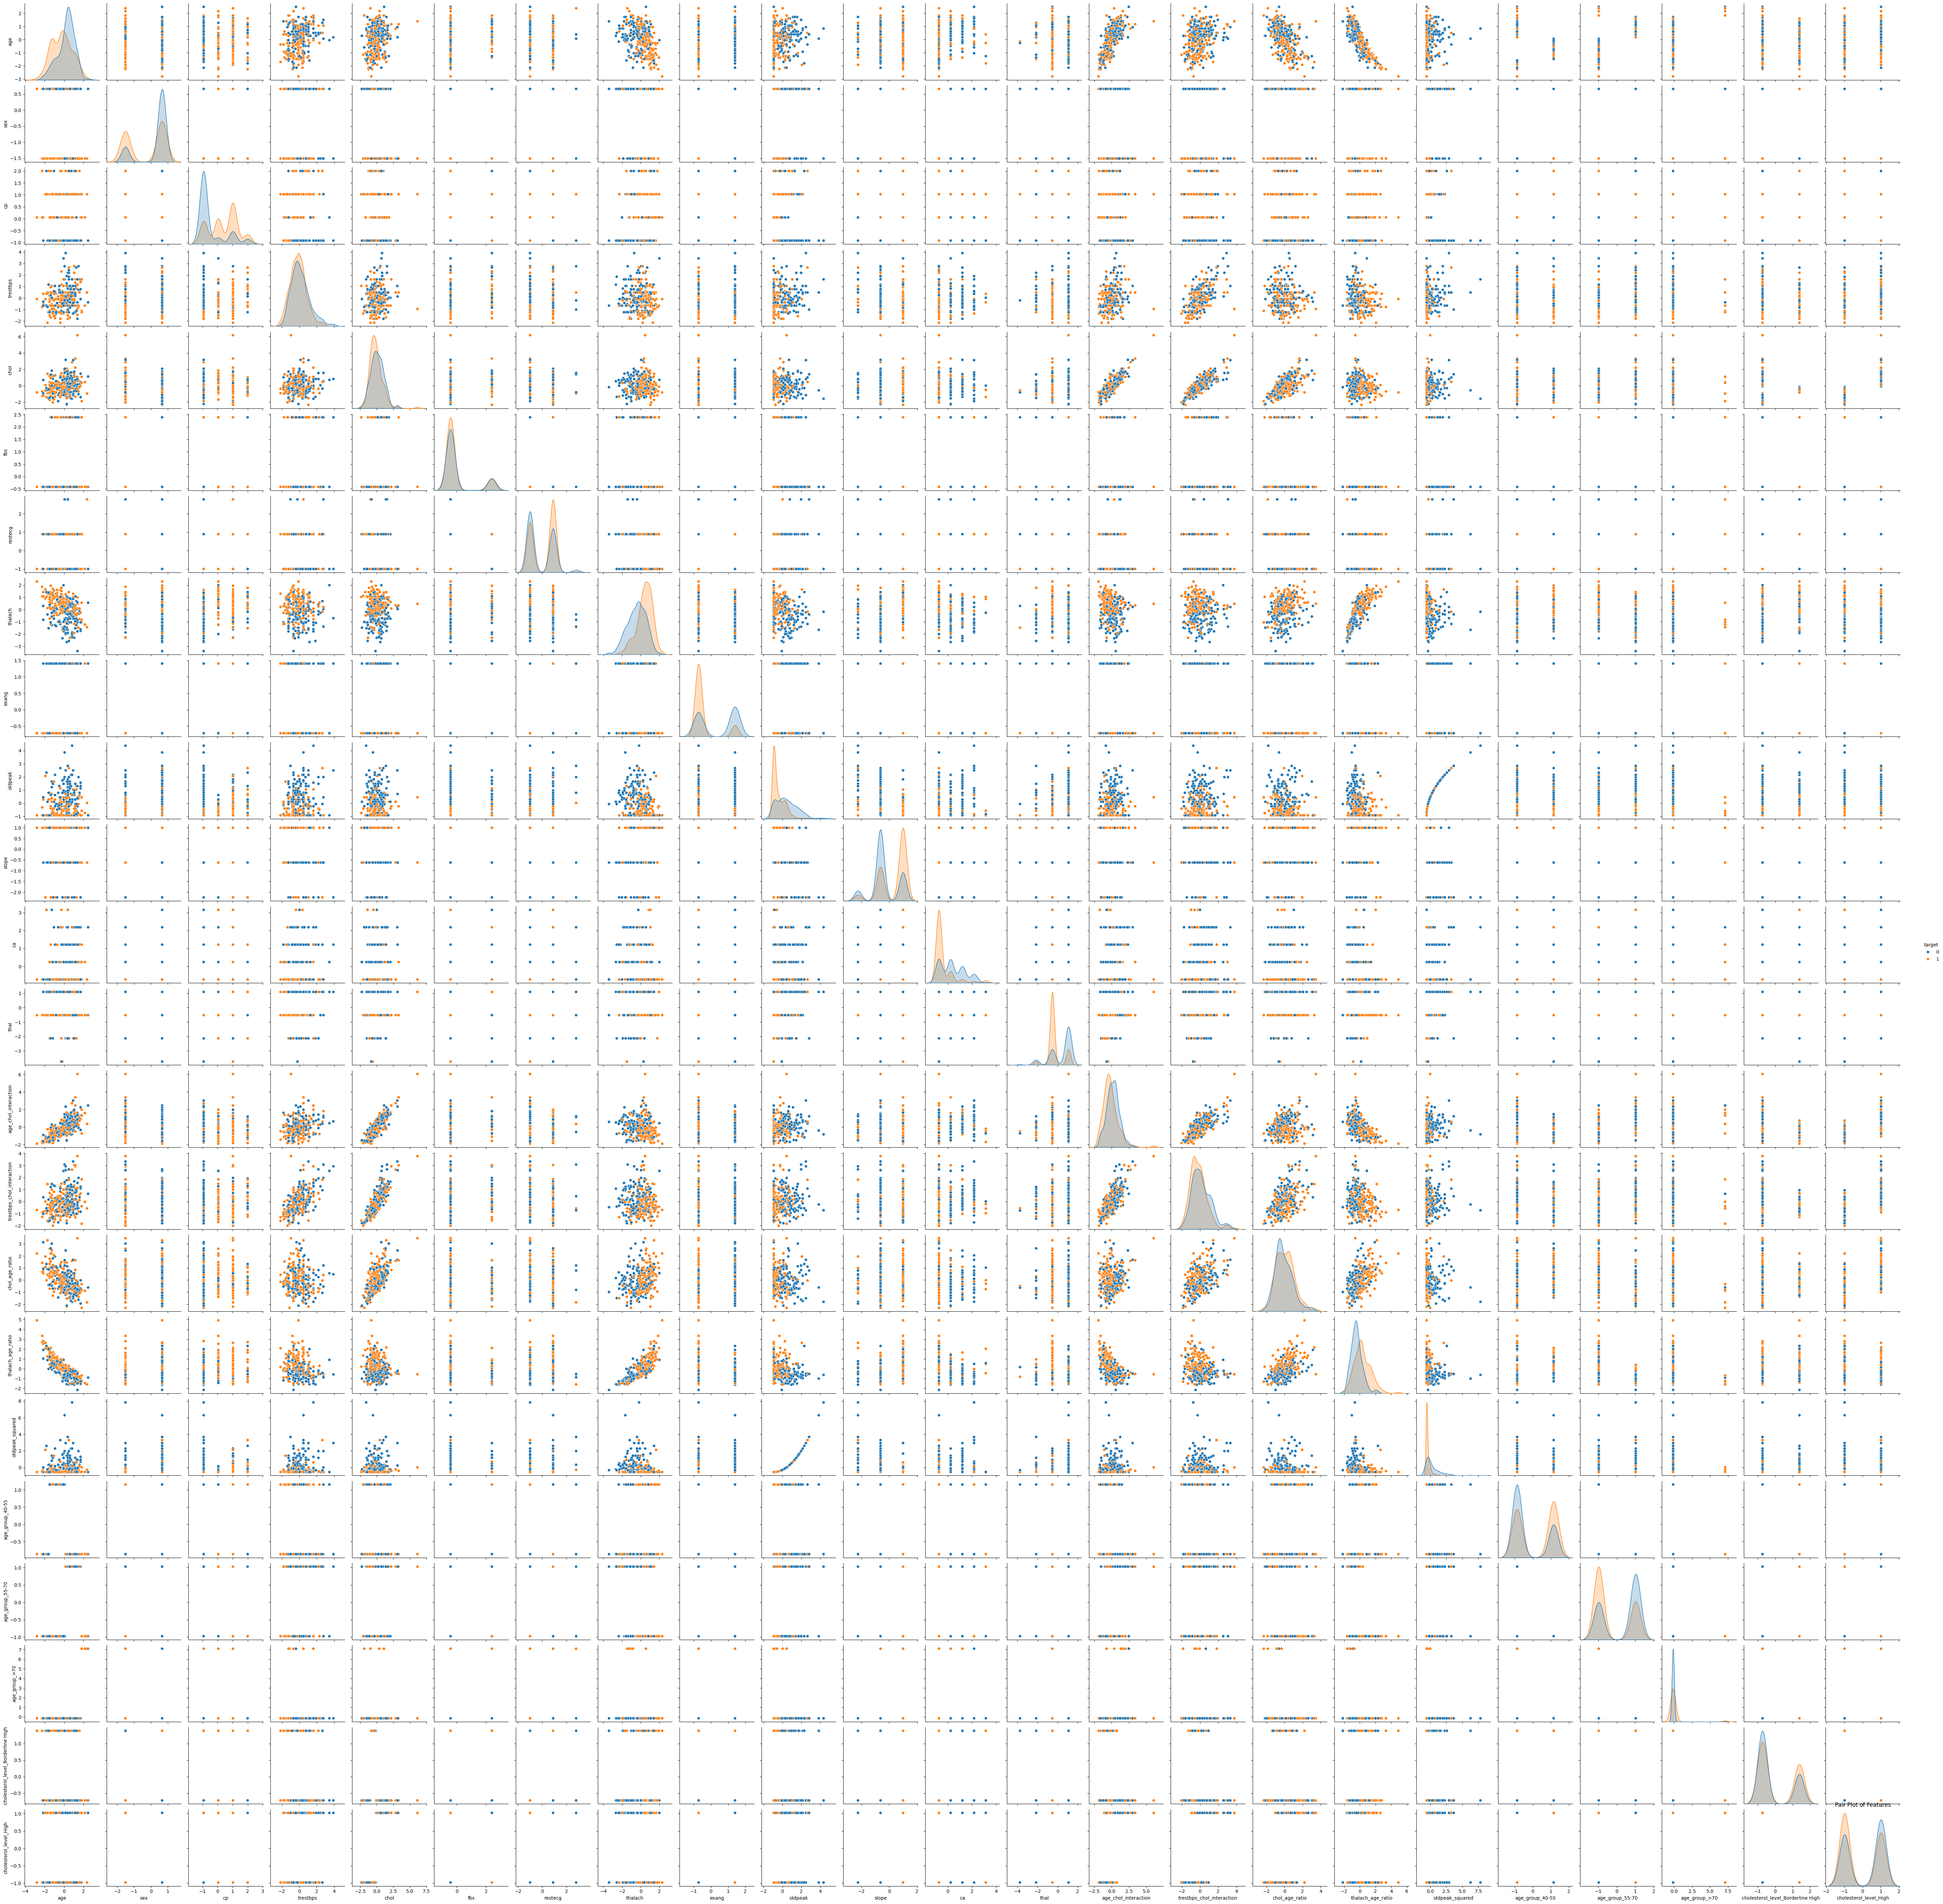

In [50]:
import seaborn as sns

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_scaled, columns=X.columns)
df_plot['target'] = y

# Plot
sns.pairplot(df_plot, hue='target', diag_kind='kde')
plt.title('Pair Plot of Features')
plt.show()

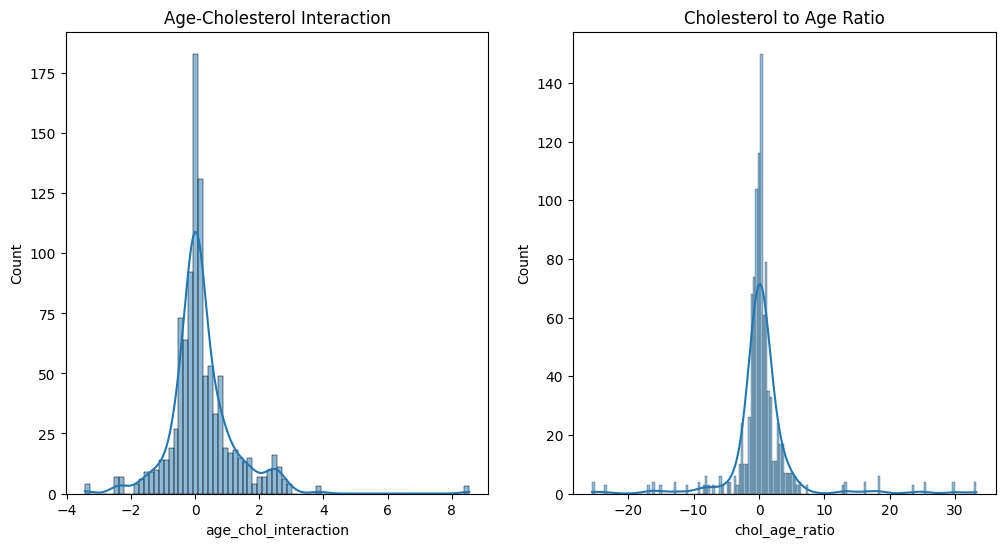

In [51]:
# Add engineered features to the DataFrame
df_plot['age_chol_interaction'] = X_scaled[:, X.columns.get_loc('age')] * X_scaled[:, X.columns.get_loc('chol')]
df_plot['chol_age_ratio'] = X_scaled[:, X.columns.get_loc('chol')] / (X_scaled[:, X.columns.get_loc('age')] + 1e-10)
# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_plot['age_chol_interaction'], kde=True)
plt.title('Age-Cholesterol Interaction')

plt.subplot(1, 2, 2)
sns.histplot(df_plot['chol_age_ratio'], kde=True)
plt.title('Cholesterol to Age Ratio')

plt.show()